In [ ]:
#importar la libreria de pandas
import pandas as pd
datos = pd.read_csv("alturas-pesos.csv")



In [ ]:
datos.head()

,Sexo,Peso,Altura
0,Hombre,109,187
1,Hombre,73,174
2,Hombre,96,188
3,Hombre,99,182
4,Hombre,93,177


<Axes: xlabel='Altura', ylabel='Peso'>

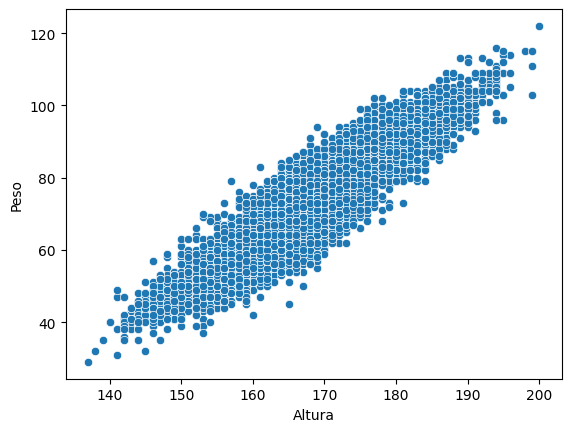

In [ ]:
import seaborn as sb
sb.scatterplot(x="Altura", y="Peso", data=datos)

In [ ]:
#Caracteristicas (x), etiquetas (y)
x = datos["Altura"]/100
y = datos ["Peso"]

In [ ]:
#Revisar que los valores de x quedaron en metros
print(x.values)

[1.87 1.74 1.88 ... 1.62 1.75 1.57]


In [ ]:
#Separar datos - Elegir cuales son para entrenar y cuales no
from sklearn.model_selection import train_test_split
x_train, x_prueba, y_train, y_prueba = train_test_split(x,y, test_size=0.2)

In [ ]:
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_prueba=x_prueba.values.reshape(-1,1)
y_prueba=y_prueba.values.reshape(-1,1)


In [ ]:
x_train = x.values.reshape(-1,1)
y_train = y.values.reshape(-1,1)

In [ ]:
#modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [ ]:
#entrenar el modelo
modelo.fit(x_train, y_train)

LinearRegression()

In [ ]:
#predicción
prediccion = modelo.predict(x_prueba)

In [ ]:
modelo.score(x_train, y_train)

0.8539647061801032

In [ ]:
modelo.score(x_prueba, y_prueba)

0.8590553362414126

In [ ]:
#diccionario con las predicciones del modelo vs. y_prueba para ver que tan alineado esta
comparativa = {"prediccion": prediccion.flatten(), "Peso real": y_prueba.flatten()}
pd.DataFrame(comparativa)

,prediccion,Peso real
0,69.877766,59
1,89.163870,94
2,74.010502,66
3,64.367450,60
4,64.367450,57
...,...,...
1995,64.367450,64
1996,54.724398,49
1997,91.919028,95
1998,80.898397,81


In [ ]:
#Ejercicio con la estatura de Juan Carlos (peso real 72)
modelo.predict([[1.65]])

array([[68.50018674]])

In [ ]:
#Ejercicio con la estatura de Laura (peso real 57)
modelo.predict([[1.73]])

array([[79.52081801]])

In [ ]:
#Ejercicio con la estatura de Maickol (peso real 56)
modelo.predict([[1.72]])

array([[78.1432391]])

In [ ]:
#Ejercicio con la estatura de John Jairo (peso real 76)
modelo.predict([[1.72]])

array([[78.1432391]])

In [ ]:
#Conclusión:
#no se distingue la población
#Aparentemente la población es "sana" no podemos identificar las costumbres, enfermedades o historia clínica de las personas
#El modelo funciona mientras la persona se encuentre en el estándar, pero no funciona bien para casos atípico